<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This repository is a result of collaborative efforts from our dedicated team at the lab. We are committed to advancing the field of biomedical AI and pushing the boundaries of medical data analysis. Your interest and contributions to our work are greatly appreciated. For more information about our lab and ongoing projects, please visit the [BioMind AI Lab website](https://sites.google.com/view/biomind-ai-lab). Thank you for your interest and support!


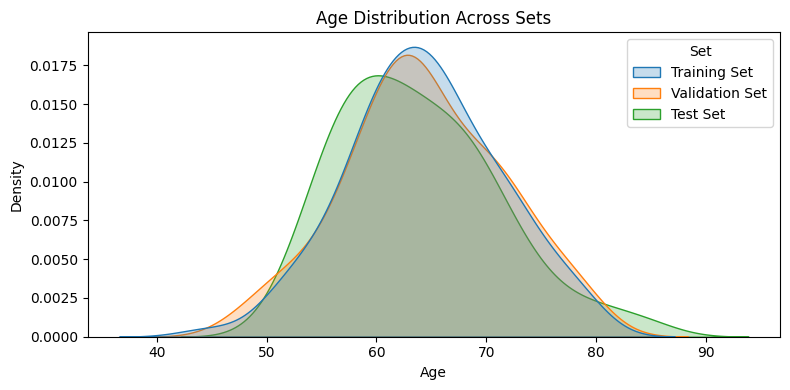

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
datasets = ['Training Set', 'Validation Set', 'Test Set']
age_means = [64.40, 65.41, 63.03]
age_stds = [7.04, 7.42, 7.69]

# Creating DataFrame for age visualization
age_data = pd.DataFrame({
    'Age': np.concatenate([np.random.normal(mean, std, 100) for mean, std in zip(age_means, age_stds)]),
    'Set': np.repeat(datasets, 100)
})

# Visualization for Age Distribution
plt.figure(figsize=(8, 4))  # Define a single figure with custom size

# Plotting the age distribution
sns.kdeplot(data=age_data, x='Age', hue="Set", fill=True)
plt.title('Age Distribution Across Sets')  # Set the title for the plot
plt.grid(False)  # Optionally, remove the grid for a cleaner look

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the plot


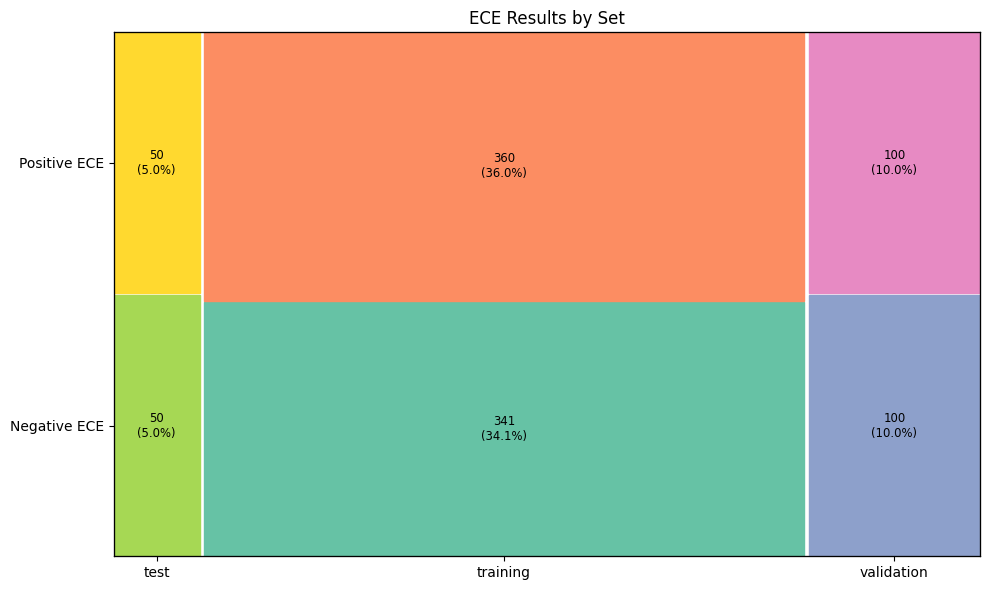

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

# Load the dataset
# Make sure to upload your file to Colab or mount your Google Drive to access the file
data_path = 'TotalData.xlsx'  # Update this path if your file is in Google Drive
data = pd.read_excel(data_path)

# Map the 'Pathology' column to 'Negative ECE' and 'Positive ECE'
data['ECE Category'] = data['Pathology'].map({'Non_T3': 'Negative ECE', 'Non_T2': 'Negative ECE', 'Yes_T3': 'Positive ECE'})

# Calculate counts for each combination of set and ECE category
mosaic_counts = data.groupby(['Set', 'ECE Category']).size().to_dict()

# Define the color palette for the sets
set_palette = sns.color_palette("Set2")

# Mapping for the sets to the palette
color_mapping = {
    'Training Negative': set_palette[0],
    'Training Positive': set_palette[1],
    'Validation Negative': set_palette[2],
    'Validation Positive': set_palette[3],
    'Test Negative': set_palette[4],
    'Test Positive': set_palette[5]
}

# Define properties for each category with sophisticated colors
props = {
    ('training', 'Negative ECE'): {'color': color_mapping['Training Negative']},
    ('training', 'Positive ECE'): {'color': color_mapping['Training Positive']},
    ('validation', 'Negative ECE'): {'color': color_mapping['Validation Negative']},
    ('validation', 'Positive ECE'): {'color': color_mapping['Validation Positive']},
    ('test', 'Negative ECE'): {'color': color_mapping['Test Negative']},
    ('test', 'Positive ECE'): {'color': color_mapping['Test Positive']}
}

# Function to create labels that show both count and percentage
def labelizer(key):
    count = mosaic_counts[key]
    total = sum(mosaic_counts.values())
    percentage = (count / total) * 100
    return f"{count}\n({percentage:.1f}%)"

# Create the plot with the new labelizer function and properties
fig, ax = plt.subplots(figsize=(10, 6))
mosaic(mosaic_counts, properties=props, ax=ax, labelizer=labelizer)
ax.set_title('ECE Results by Set')
plt.tight_layout()
plt.show()


<Figure size 1000x1000 with 0 Axes>

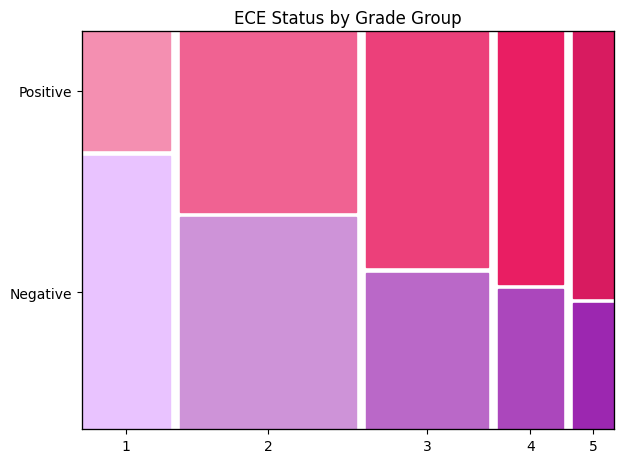

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

# Load your dataset
data_path = '/content/data.txt'  # Update this path accordingly
data = pd.read_csv(data_path, sep='\t')

# Extracting ECE status from the 'Name' column
data['ECE_Status'] = data['Name'].apply(lambda x: 'Positive' if 'Y' in x else 'Negative')

# Create a contingency table for ISUP Grade Group and ECE Status
contingency_table = pd.crosstab(data['Preop ISUP Grade Group'], data['ECE_Status'])

# Define a custom palette with pink and purple tones
palette = ['#e9c3ff', '#f48fb1',  # Purple to Pink for one grade group
           '#ce93d8', '#f06292',  # Another shade of Purple to Pink
           '#ba68c8', '#ec407a',  # And so on...
           '#ab47bc', '#e91e63',
           '#9c27b0', '#d81b60']
# Ensure the palette has enough colors for all combinations
palette = palette * ((contingency_table.shape[0] * 2) // len(palette) + 1)

# Define properties for each cell in the mosaic plot. This remains unchanged.
def properties(key):
    idx = (int(key[0]) - 1) * 2  # Adjust the index for color mapping
    if key[1] == 'Positive':
        idx += 1
    return {'color': palette[idx]}

# Modify the labelizer function to return an empty string, effectively removing labels from the plot
def labelizer(key):
    return ''

# Set the font size for the plot
font_size = 12  # You can adjust this value as needed

# Generate the mosaic plot without internal labels
plt.figure(figsize=(10, 10))
mosaic(contingency_table.stack(), gap=0.02, properties=properties, labelizer=labelizer,
       title='ECE Status by Grade Group')
plt.rcParams.update({'font.size': font_size})  # Update the font size for the plot
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Decision Tree - Accuracy: 0.64, AUC: 0.65
Random Forest - Accuracy: 0.62, AUC: 0.65
XGBoost - Accuracy: 0.63, AUC: 0.68


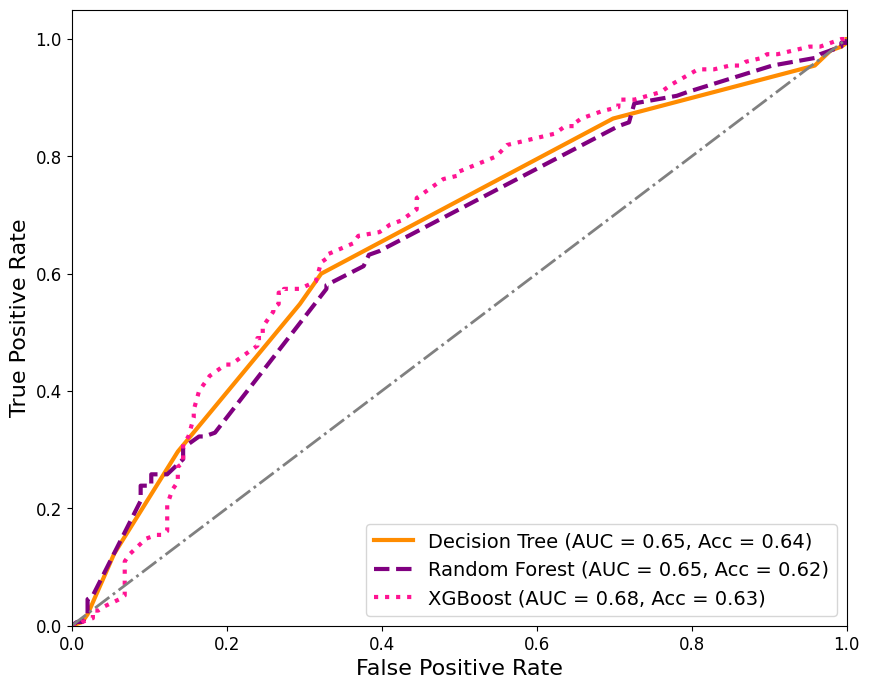

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_excel('/content/data_dt.xlsx')

# Convert 'ECE Result' to binary (0 and 1), one-hot encode necessary columns
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
# Combine features without 'Pathology'
X = pd.concat([data[['PatientAge']], X_grade_group], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grids
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 10]
}

# Optimizing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)
best_dt_classifier = dt_random_search.best_estimator_

# Optimizing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
best_rf_classifier = rf_random_search.best_estimator_

# Optimizing XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
best_xgb_classifier = xgb_random_search.best_estimator_

# Get predicted probabilities and compute ROC AUC for each classifier
y_prob_best_dt = best_dt_classifier.predict_proba(X_test)[:, 1]
y_prob_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_best_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_best_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate accuracies
accuracy_best_dt = accuracy_score(y_test, best_dt_classifier.predict(X_test))
accuracy_best_rf = accuracy_score(y_test, best_rf_classifier.predict(X_test))
accuracy_best_xgb = accuracy_score(y_test, best_xgb_classifier.predict(X_test))

# Print the accuracy and AUC of each model
print(f'Decision Tree - Accuracy: {accuracy_best_dt:.2f}, AUC: {roc_auc_dt:.2f}')
print(f'Random Forest - Accuracy: {accuracy_best_rf:.2f}, AUC: {roc_auc_rf:.2f}')
print(f'XGBoost - Accuracy: {accuracy_best_xgb:.2f}, AUC: {roc_auc_xgb:.2f}')

# Plot the ROC curves with accuracies included in the legend
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, linestyle='-', label=f'Decision Tree (AUC = {roc_auc_dt:.2f}, Acc = {accuracy_best_dt:.2f})')  # Increase line width
plt.plot(fpr_rf, tpr_rf, color='purple', lw=3, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Acc = {accuracy_best_rf:.2f})')  # Increase line width
plt.plot(fpr_xgb, tpr_xgb, color='deeppink', lw=3, linestyle=':', label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Acc = {accuracy_best_xgb:.2f})')  # Increase line width
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)  # Increase font size
plt.ylabel('True Positive Rate', fontsize=16)  # Increase font size
#plt.title('ROC Curves for Optimized Classifiers', fontsize=20)  # Increase font size for the title
plt.legend(loc="lower right", fontsize=14)  # Increase font size for the legend

# This line removes the grid
plt.grid(False)

# Save the figure to a PDF file
plt.savefig('/content/tree-total.pdf', format='pdf', bbox_inches='tight')
plt.show()


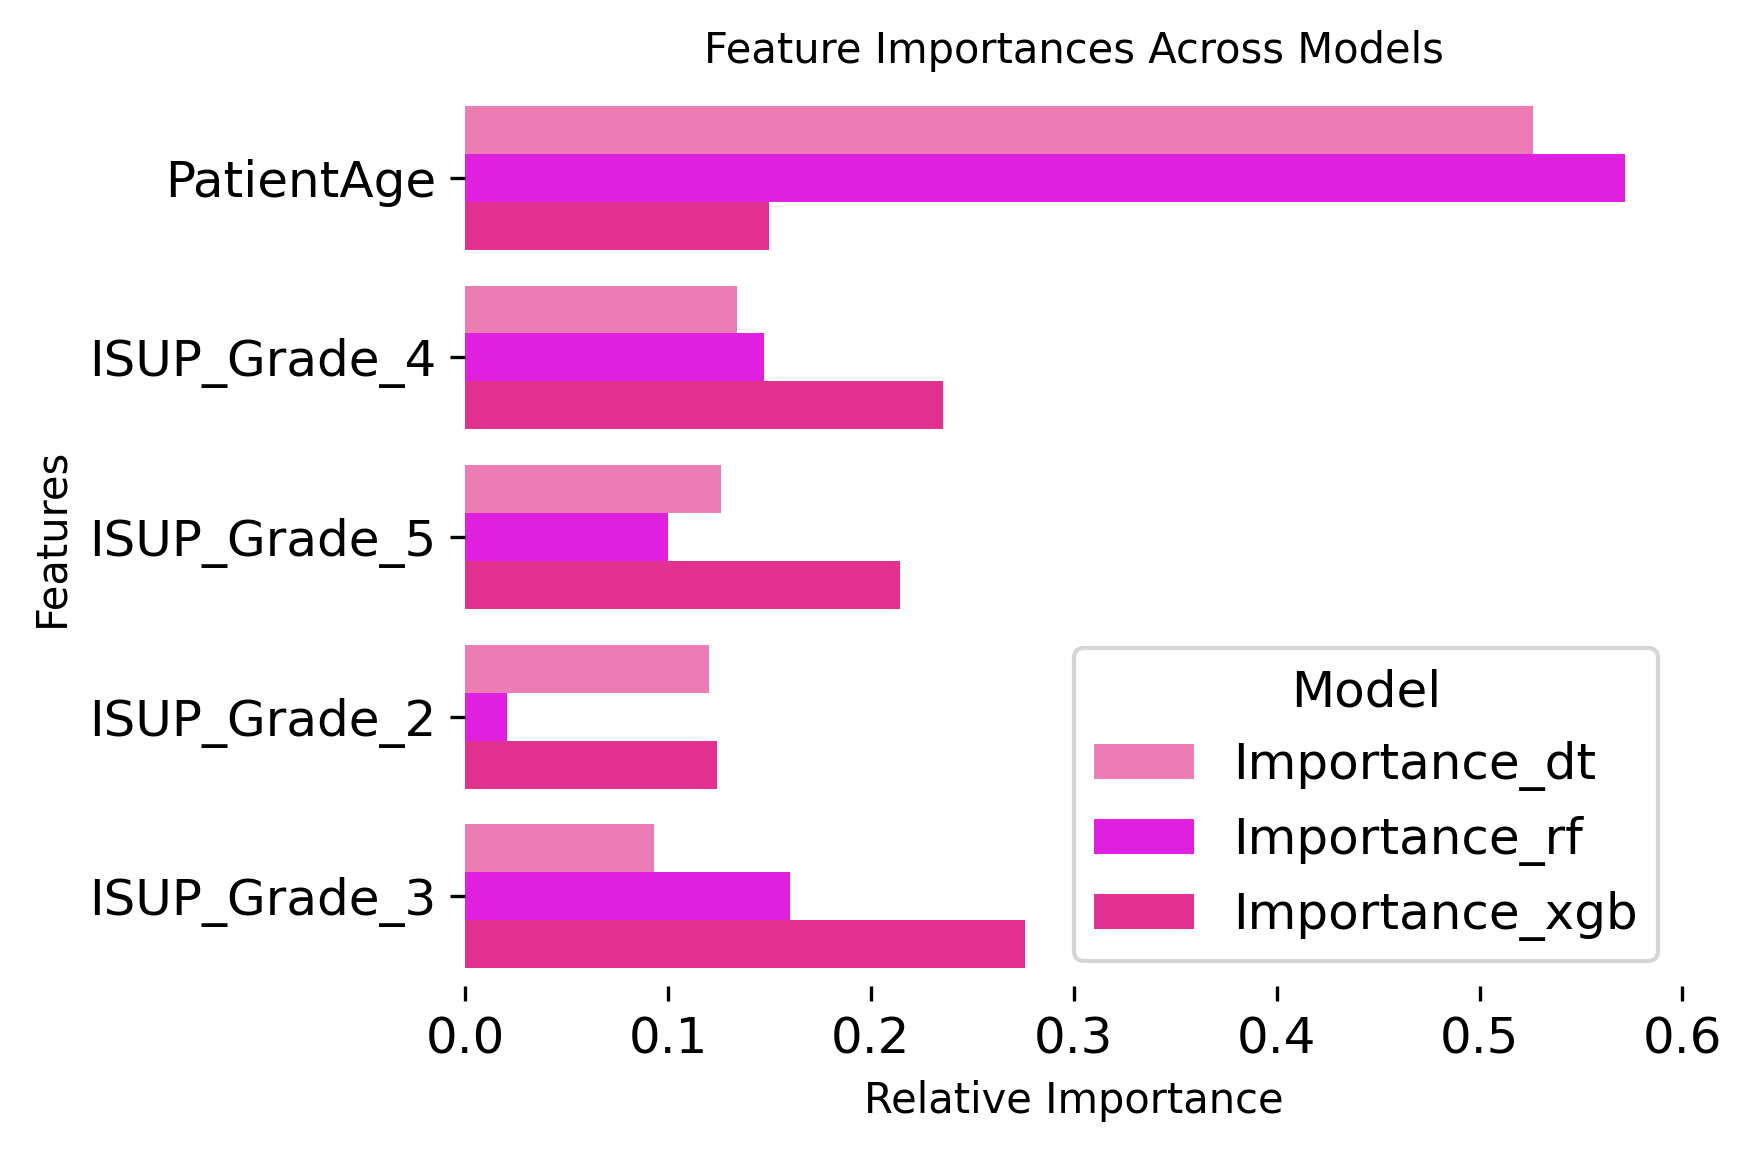

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X, best_dt_classifier, best_rf_classifier, best_xgb_classifier are already defined as per your previous code.

# Function to get feature importances data
def get_feature_importances_data(model, features):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': features, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)
    return df

# Get data for each model
dt_data = get_feature_importances_data(best_dt_classifier, X.columns)
rf_data = get_feature_importances_data(best_rf_classifier, X.columns)
xgb_data = get_feature_importances_data(best_xgb_classifier, X.columns)

# Combine data
combined_data = pd.merge(dt_data, rf_data, on='Feature', suffixes=('_dt', '_rf'))
combined_data = pd.merge(combined_data, xgb_data, on='Feature')
combined_data.columns = ['Feature', 'Importance_dt', 'Importance_rf', 'Importance_xgb']

# Melt the data
melted_data = pd.melt(combined_data, id_vars='Feature', var_name='Model', value_name='Importance')

# Create the color palette
palette = {
    'Importance_dt': 'hotpink',
    'Importance_rf': 'magenta',
    'Importance_xgb': 'deeppink'
}

# Plot
plt.figure(figsize=(6, 4), dpi=300)
sns.barplot(x='Importance', y='Feature', hue='Model', data=melted_data, palette=palette)

plt.title('Feature Importances Across Models', fontsize=10)
plt.xlabel('Relative Importance', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.legend(title='Model', loc='lower right')  # Place the legend inside the plot area
sns.despine(left=True, bottom=True)  # Optionally remove the top and right spines

# This line removes the grid
plt.grid(False)

plt.tight_layout()
plt.savefig('/content/feature_total.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Decision Tree - Accuracy: 0.57, AUC: 0.54
Random Forest - Accuracy: 0.57, AUC: 0.63
XGBoost - Accuracy: 0.53, AUC: 0.54


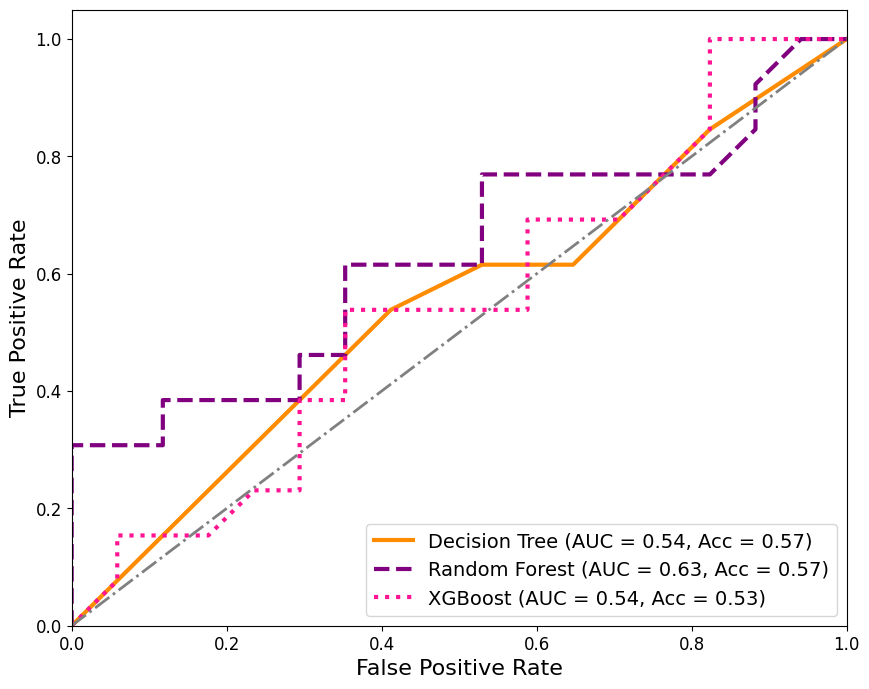

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_excel('/content/data_outAI.xlsx')

# Convert 'ECE Result' to binary (0 and 1), one-hot encode necessary columns
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)
# Combine features without 'Pathology'
X = pd.concat([data[['PatientAge']], X_grade_group], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grids
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 10]
}

# Optimizing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)
best_dt_classifier = dt_random_search.best_estimator_

# Optimizing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
best_rf_classifier = rf_random_search.best_estimator_

# Optimizing XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)
best_xgb_classifier = xgb_random_search.best_estimator_

# Get predicted probabilities and compute ROC AUC for each classifier
y_prob_best_dt = best_dt_classifier.predict_proba(X_test)[:, 1]
y_prob_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_best_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_best_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate accuracies
accuracy_best_dt = accuracy_score(y_test, best_dt_classifier.predict(X_test))
accuracy_best_rf = accuracy_score(y_test, best_rf_classifier.predict(X_test))
accuracy_best_xgb = accuracy_score(y_test, best_xgb_classifier.predict(X_test))

# Print the accuracy and AUC of each model
print(f'Decision Tree - Accuracy: {accuracy_best_dt:.2f}, AUC: {roc_auc_dt:.2f}')
print(f'Random Forest - Accuracy: {accuracy_best_rf:.2f}, AUC: {roc_auc_rf:.2f}')
print(f'XGBoost - Accuracy: {accuracy_best_xgb:.2f}, AUC: {roc_auc_xgb:.2f}')

# Plot the ROC curves with accuracies included in the legend
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, linestyle='-', label=f'Decision Tree (AUC = {roc_auc_dt:.2f}, Acc = {accuracy_best_dt:.2f})')  # Increase line width
plt.plot(fpr_rf, tpr_rf, color='purple', lw=3, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Acc = {accuracy_best_rf:.2f})')  # Increase line width
plt.plot(fpr_xgb, tpr_xgb, color='deeppink', lw=3, linestyle=':', label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Acc = {accuracy_best_xgb:.2f})')  # Increase line width
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)  # Increase font size
plt.ylabel('True Positive Rate', fontsize=16)  # Increase font size
#plt.title('ROC Curves for Optimized Classifiers', fontsize=20)  # Increase font size for the title
plt.legend(loc="lower right", fontsize=14)  # Increase font size for the legend

# This line removes the grid
plt.grid(False)

# Save the figure to a PDF file
plt.savefig('/content/tree-outAI.pdf', format='pdf', bbox_inches='tight')
plt.show()


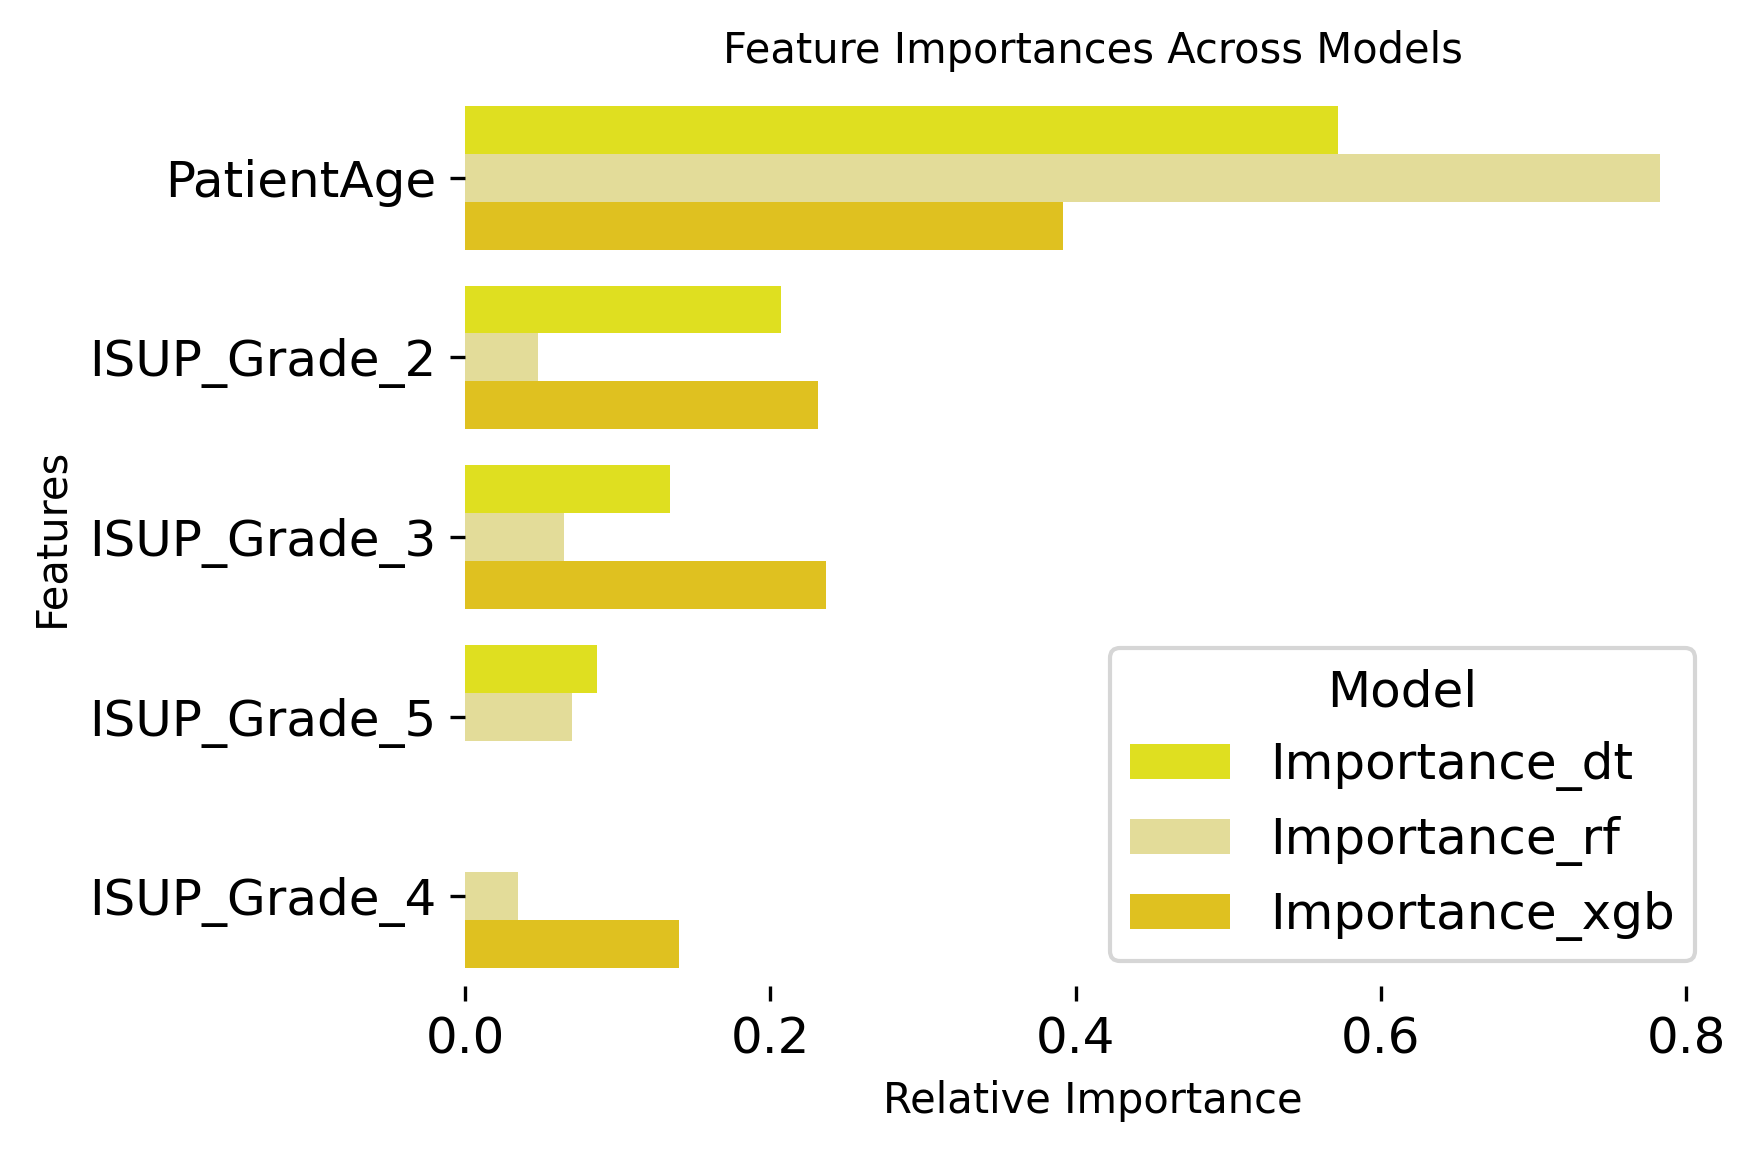

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X, best_dt_classifier, best_rf_classifier, best_xgb_classifier are already defined as per your previous code.

# Function to get feature importances data
def get_feature_importances_data(model, features):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': features, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)
    return df

# Get data for each model
dt_data = get_feature_importances_data(best_dt_classifier, X.columns)
rf_data = get_feature_importances_data(best_rf_classifier, X.columns)
xgb_data = get_feature_importances_data(best_xgb_classifier, X.columns)

# Combine data
combined_data = pd.merge(dt_data, rf_data, on='Feature', suffixes=('_dt', '_rf'))
combined_data = pd.merge(combined_data, xgb_data, on='Feature')
combined_data.columns = ['Feature', 'Importance_dt', 'Importance_rf', 'Importance_xgb']

# Melt the data
melted_data = pd.melt(combined_data, id_vars='Feature', var_name='Model', value_name='Importance')

# Create the color palette in shades of blue
palette = {
    'Importance_dt': 'yellow',  # A light yellow color
    'Importance_rf': 'khaki',  # A khaki color that is a bit darker
    'Importance_xgb': 'gold'  # A darker, golden yellow color
}

# Plot
plt.figure(figsize=(6, 4), dpi=300)
sns.barplot(x='Importance', y='Feature', hue='Model', data=melted_data, palette=palette)

plt.title('Feature Importances Across Models', fontsize=10)
plt.xlabel('Relative Importance', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.legend(title='Model', loc='lower right')  # Place the legend inside the plot area
sns.despine(left=True, bottom=True)  # Optionally remove the top and right spines

# This line removes the grid
plt.grid(False)

plt.tight_layout()
plt.savefig('/content/feature_outAI.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Decision Tree - Accuracy: 0.73, AUC: 0.81
Random Forest - Accuracy: 0.73, AUC: 0.81
XGBoost - Accuracy: 0.73, AUC: 0.78


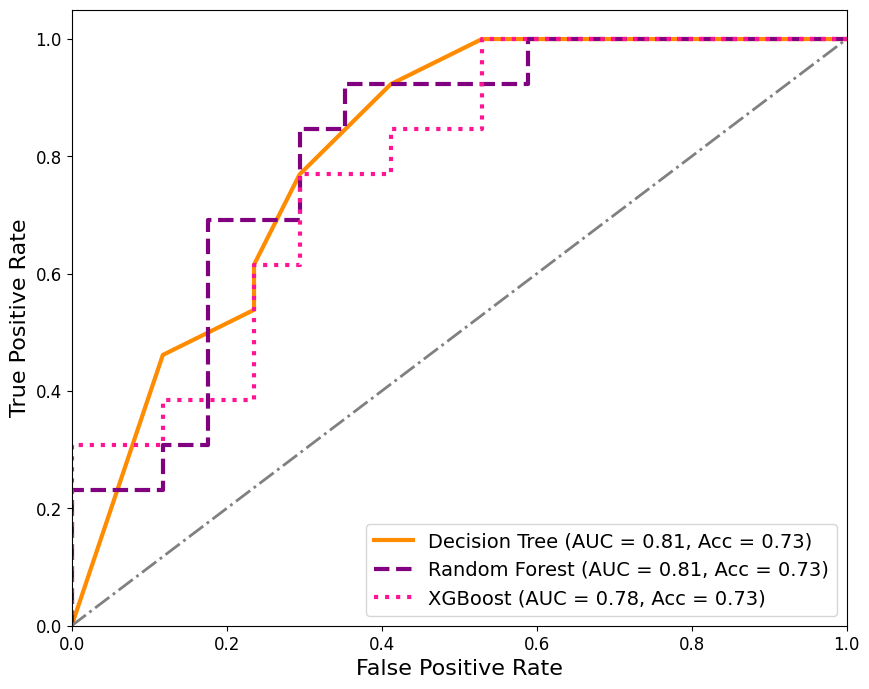

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_excel('/content/data_inAI.xlsx')  # Make sure the path matches your actual file location

# Convert 'ECE Result' to binary (0 and 1), one-hot encode necessary columns
data['ECE_Result'] = data['ECE Result'].map({'Y': 1, 'N': 0})
X_grade_group = pd.get_dummies(data['Preop ISUP Grade Group'], prefix='ISUP_Grade', drop_first=True)

# Exclude the 'Pathology' feature but include the 'Prediction by AI' and 'PatientAge' features along with the one-hot encoded 'Preop ISUP Grade Group'
X = pd.concat([data[['PatientAge', 'Prediction by AI']], X_grade_group], axis=1)
y = data['ECE_Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameter grids for each classifier
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 10]
}

# Optimizing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_random_search = RandomizedSearchCV(dt_classifier, dt_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
dt_random_search.fit(X_train, y_train)

# Optimizing Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

# Optimizing XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, n_iter=20, cv=4, verbose=1, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)

# Extract best estimators
best_dt_classifier = dt_random_search.best_estimator_
best_rf_classifier = rf_random_search.best_estimator_
best_xgb_classifier = xgb_random_search.best_estimator_

# Predict and evaluate each model
# Prediction probabilities
y_prob_best_dt = best_dt_classifier.predict_proba(X_test)[:, 1]
y_prob_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

# ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_best_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_best_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_best_xgb)

# AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Accuracies
accuracy_best_dt = accuracy_score(y_test, best_dt_classifier.predict(X_test))
accuracy_best_rf = accuracy_score(y_test, best_rf_classifier.predict(X_test))
accuracy_best_xgb = accuracy_score(y_test, best_xgb_classifier.predict(X_test))

# Print the accuracy and AUC of each model
print(f'Decision Tree - Accuracy: {accuracy_best_dt:.2f}, AUC: {roc_auc_dt:.2f}')
print(f'Random Forest - Accuracy: {accuracy_best_rf:.2f}, AUC: {roc_auc_rf:.2f}')
print(f'XGBoost - Accuracy: {accuracy_best_xgb:.2f}, AUC: {roc_auc_xgb:.2f}')

# Plot the ROC curves with accuracies included in the legend
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, linestyle='-', label=f'Decision Tree (AUC = {roc_auc_dt:.2f}, Acc = {accuracy_best_dt:.2f})')  # Increase line width
plt.plot(fpr_rf, tpr_rf, color='purple', lw=3, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f}, Acc = {accuracy_best_rf:.2f})')  # Increase line width
plt.plot(fpr_xgb, tpr_xgb, color='deeppink', lw=3, linestyle=':', label=f'XGBoost (AUC = {roc_auc_xgb:.2f}, Acc = {accuracy_best_xgb:.2f})')  # Increase line width
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)  # Increase font size
plt.ylabel('True Positive Rate', fontsize=16)  # Increase font size
#plt.title('ROC Curves for Optimized Classifiers', fontsize=20)  # Increase font size for the title
plt.legend(loc="lower right", fontsize=14)  # Increase font size for the legend


# This line removes the grid
plt.grid(False)

# Save the figure to a PDF file
plt.savefig('/content/tree-inAI.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


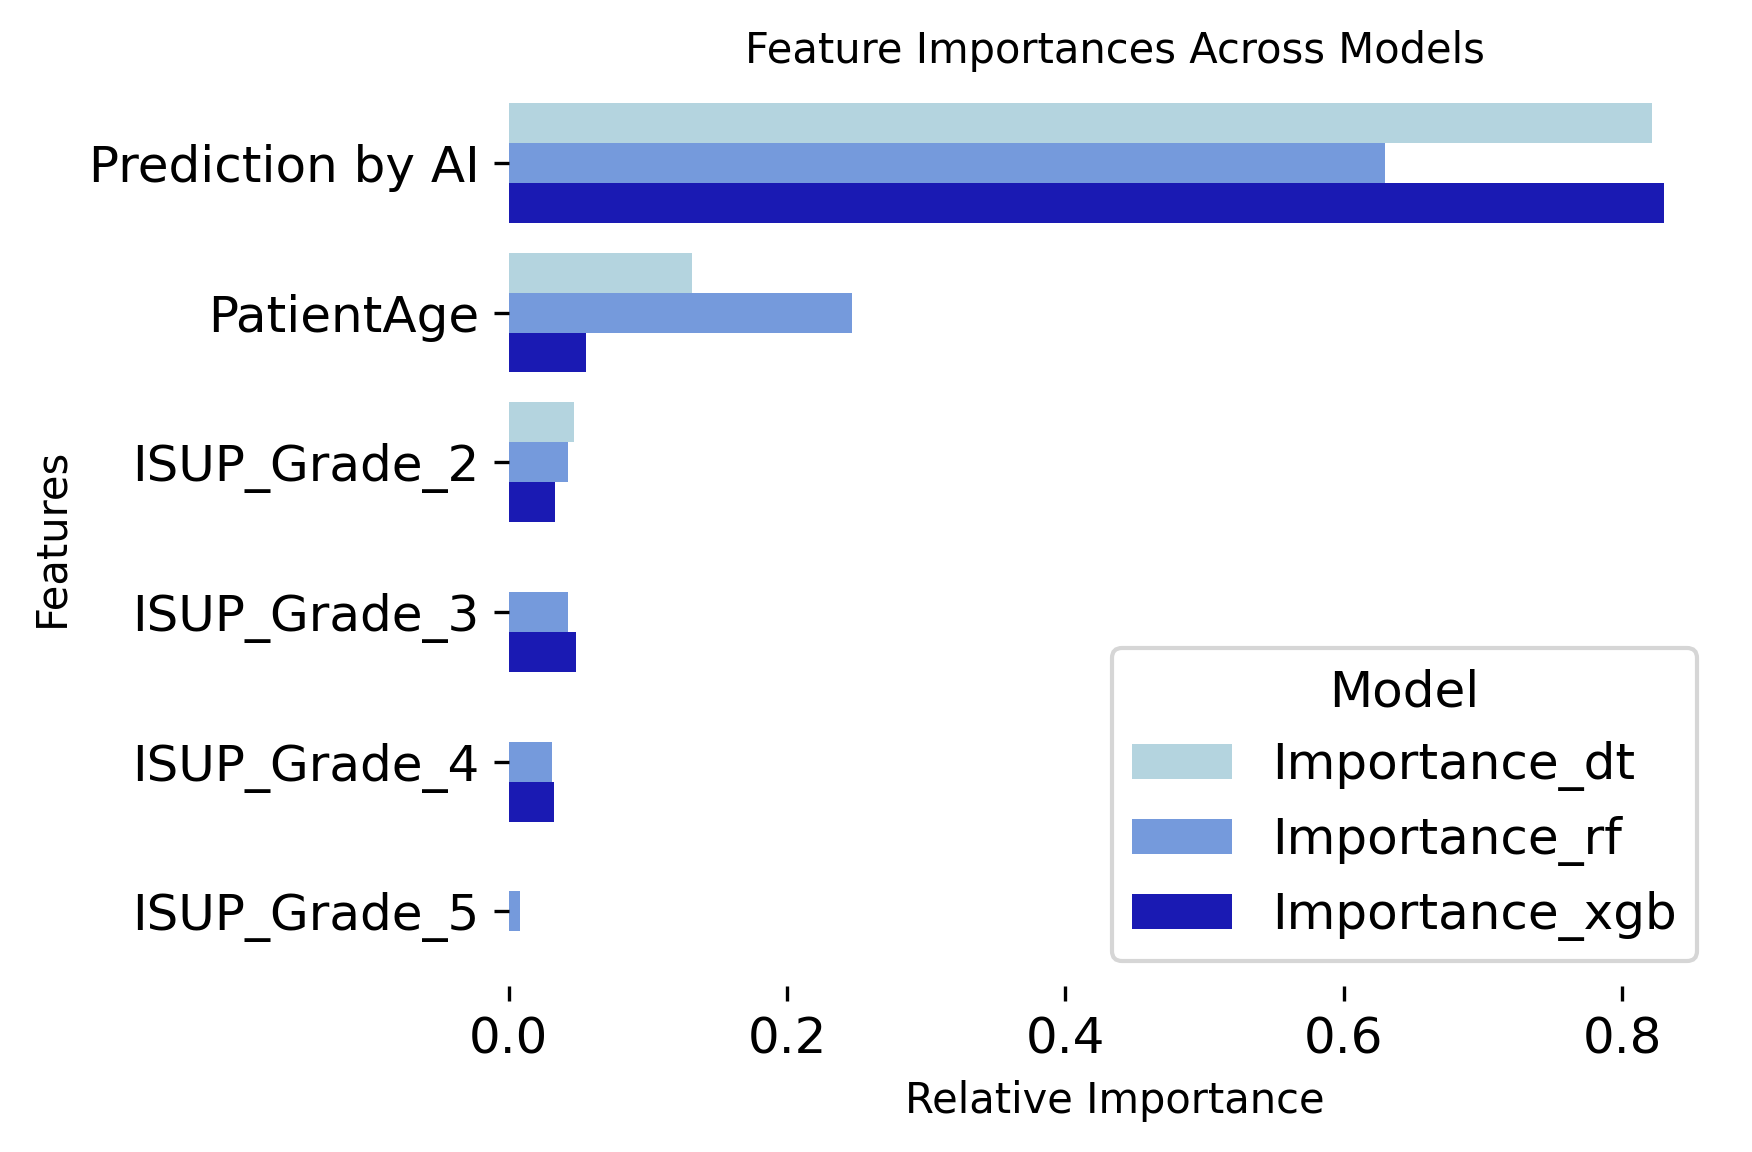

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming X, best_dt_classifier, best_rf_classifier, best_xgb_classifier are already defined as per your previous code.

# Function to get feature importances data
def get_feature_importances_data(model, features):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': features, 'Importance': importances})
    df = df.sort_values(by='Importance', ascending=False)
    return df

# Get data for each model
dt_data = get_feature_importances_data(best_dt_classifier, X.columns)
rf_data = get_feature_importances_data(best_rf_classifier, X.columns)
xgb_data = get_feature_importances_data(best_xgb_classifier, X.columns)

# Combine data
combined_data = pd.merge(dt_data, rf_data, on='Feature', suffixes=('_dt', '_rf'))
combined_data = pd.merge(combined_data, xgb_data, on='Feature')
combined_data.columns = ['Feature', 'Importance_dt', 'Importance_rf', 'Importance_xgb']

# Melt the data
melted_data = pd.melt(combined_data, id_vars='Feature', var_name='Model', value_name='Importance')

# Create the color palette in shades of yellow
palette = {
    'Importance_dt': 'lightblue',  # A light blue color
    'Importance_rf': 'cornflowerblue',  # A medium blue color
    'Importance_xgb': 'mediumblue'  # A darker blue color
}

# Plot
plt.figure(figsize=(6, 4), dpi=300)
sns.barplot(x='Importance', y='Feature', hue='Model', data=melted_data, palette=palette)

plt.title('Feature Importances Across Models', fontsize=10)
plt.xlabel('Relative Importance', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.legend(title='Model', loc='lower right')  # Place the legend inside the plot area
sns.despine(left=True, bottom=True)  # Optionally remove the top and right spines

# This line removes the grid
plt.grid(False)

plt.tight_layout()
plt.savefig('/content/feature_inAI.pdf', format='pdf', bbox_inches='tight')  # Adjusted the path for saving
plt.show()


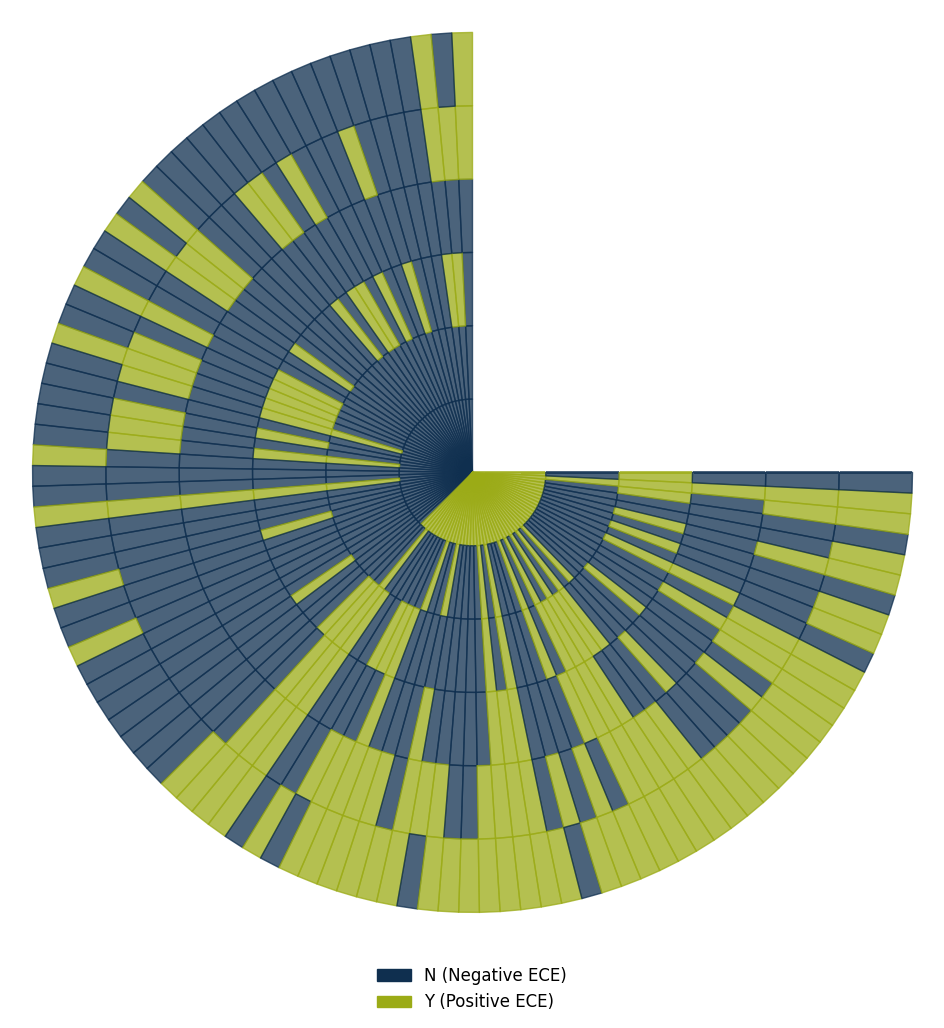

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

# Load your data
data = pd.read_excel('/content/data_circle.xlsx')  # Update the file name if needed


# Function to assign colors based on 'Y' or 'N'
def get_color(value):
    if value == '0':
        return '#0f2f4f'  # Color for 'N'
    elif value == '1':
        return '#9bab16'  # Color for 'Y'
    return 'white'  # Fallback color (ideally unused)

# Function to clean data and convert predictions to 'Y' or 'N' values
def predictions_to_binary(df):
    binary_matrix = df.iloc[:, 1:]
    binary_matrix = binary_matrix.fillna('NA')
    binary_matrix = binary_matrix.applymap(lambda x: '0' if x == 'N' else '1')
    return binary_matrix

binary_prediction = predictions_to_binary(data)

# Updated order of predictions, with AI first and Ground Truth last (to be innermost)
comparison_cols = ['Prediction by AI', 'Prediction by Rad 1', 'Prediction by Rad 2', 'Prediction by Rad 3', 'Radiology Report', 'Ground Truth']

# Prepare the data, including the 'Ground Truth' at the end for plotting last
binary_matrix = predictions_to_binary(data)


start_angle = 90
end_angle = start_angle + 270
angles = np.linspace(np.deg2rad(start_angle), np.deg2rad(end_angle), len(binary_matrix) + 1)

# Plot the circular heatmap
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
# Adjust the radii to place Ground Truth on the outside, followed by AI and radiologists
radii = np.arange(len(comparison_cols) + 2)  # Plus 2 for Ground Truth and proper spacing

for case_idx in range(len(binary_matrix)):
    for prediction_idx, column in reversed(list(enumerate(comparison_cols))):
        value = binary_matrix.iloc[case_idx, prediction_idx]
        color = get_color(value)
        theta_range = angles[case_idx:case_idx + 2]
        # Adjusting the radii based on reversed order
        r_inner = radii[len(comparison_cols) - prediction_idx - 1]
        r_outer = radii[len(comparison_cols) - prediction_idx]
        ax.fill_between(theta_range, r_inner, r_outer, color=color, alpha=0.75)

# Commented out the call to add labels inside the circles
# add_aligned_labels(ax, comparison_cols, start_angle, end_angle)

# Add a legend
blue_patch = Patch(color='#0f2f4f', label='N (Negative ECE)')
red_patch = Patch(color='#9bab16', label='Y (Positive ECE)')
ax.legend(handles=[blue_patch, red_patch], loc='lower center', bbox_to_anchor=(0.5, -0.1), frameon=False)

# Final adjustments
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines['polar'].set_visible(False)  # Hide the outer circle

plt.savefig('/content/circularHeatmap.pdf', format='pdf', bbox_inches='tight')

plt.show()

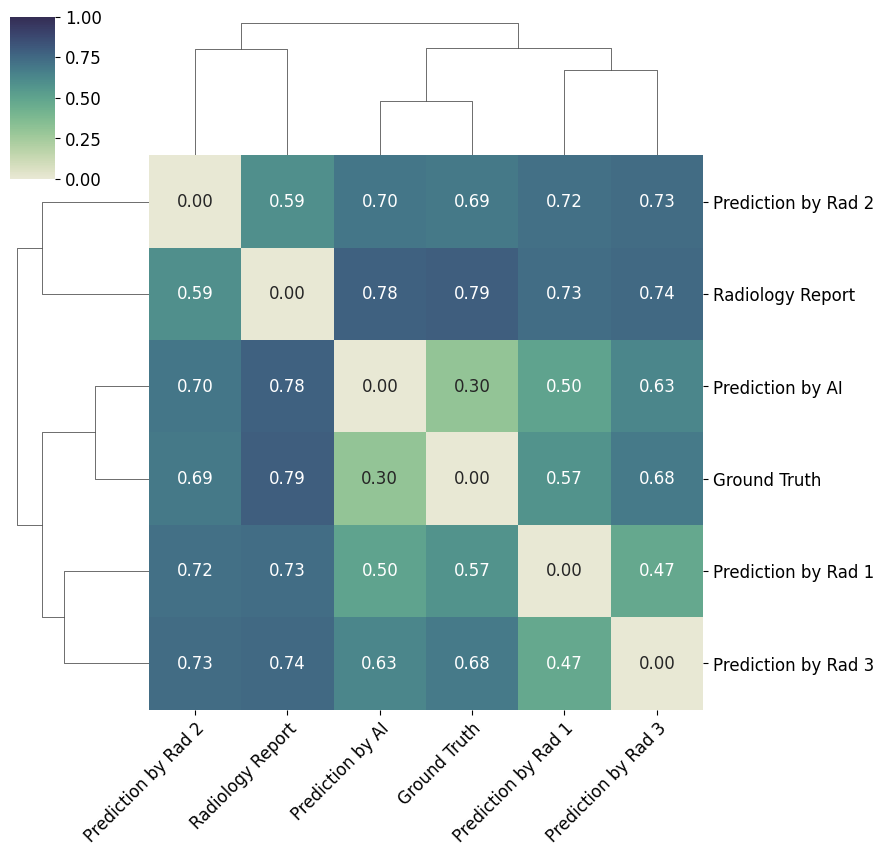

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

data_path = '/content/data_dendro.xlsx'
data = pd.read_excel(data_path)

# Assuming "Ground Truth" is a column you want to include in the heatmap.
data['Name'] = data.index  # Adjust if you have a specific column for case names/IDs
clustering_data = data.set_index('Name').T  # Transpose so entities are rows

# Calculate the pairwise Jaccard distances
jaccard_distances = pdist(clustering_data, metric='jaccard')

# Hierarchical clustering
row_linkage = linkage(jaccard_distances, method='average')

# Generate a custom grey to green cubehelix palette
cmap = sns.cubehelix_palette(start=.5, rot=-.75, light=0.9, dark=0.2, as_cmap=True)

# Create a clustered heatmap with dendrogram using the custom palette
g = sns.clustermap(squareform(jaccard_distances), row_linkage=row_linkage, col_linkage=row_linkage,
                   cmap=cmap, figsize=(9, 9), annot=True, fmt=".2f",
                   xticklabels=clustering_data.index, yticklabels=clustering_data.index,
                   vmin=0, vmax=1)  # Set the range of the colormap scale to full 0 to 1

# Improve readability of labels
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", color="black")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, color="black")

# Save the figure
plt.savefig('/content/Dendrogram.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load the data
data_path = '/content/data_dendro.xlsx'
data = pd.read_excel(data_path)

# Adjust the entities list to match your column names
entities = [
    'Prediction by AI',
    'Prediction by Rad 1',
    'Prediction by Rad 2',
    'Prediction by Rad 3',
    'Radiology Report'
]

# Check if all specified columns are present in the DataFrame
missing_columns = [entity for entity in entities + ['Ground Truth'] if entity not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in the data: {missing_columns}")

# Initialize a list to store Cohen's Kappa scores
kappa_scores = []

# Calculate Cohen's Kappa for each entity against the "Ground Truth"
for entity in entities:
    score = cohen_kappa_score(data[entity], data['Ground Truth'])
    kappa_scores.append((entity, score))

# Convert to DataFrame for easier visualization
kappa_df = pd.DataFrame(kappa_scores, columns=['Entity', 'Cohen\'s Kappa'])

# Display the results
print(kappa_df)


                Entity  Cohen's Kappa
0     Prediction by AI           0.64
1  Prediction by Rad 1           0.22
2  Prediction by Rad 2           0.30
3  Prediction by Rad 3           0.08
4     Radiology Report           0.16


The Cohen's kappa coefficient is a statistical measure used to evaluate the agreement between two raters who each classify items into mutually exclusive categories. The value of Cohen's kappa ranges from -1 to 1, where:

1 indicates perfect agreement,

0 indicates no agreement beyond what is expected by chance,

-1 indicates perfect disagreement.

A kappa of 0.64 falls within the generally accepted range of "good" agreement according to commonly used benchmarks for interpreting Cohen's kappa:

Less than 0: Poor agreement

0.01 to 0.20: Slight agreement

0.21 to 0.40: Fair agreement

0.41 to 0.60: Moderate agreement

0.61 to 0.80: Substantial (or good) agreement

0.81 to 0.99: Almost perfect agreement


So, a Cohen's kappa of 0.64 suggests a substantial level of agreement between the raters, which is typically considered good and indicates a significant degree of concordance beyond what would be expected by chance. This level of kappa is quite reliable in many fields, including medical research and social sciences, where it is often used to verify the consistency of diagnostic codes, assessments, or other categorical evaluations.

In [ ]:
# Import the necessary library
import pandas as pd

data_path = '/content/data_dendro.xlsx'

# Load the data
data = pd.read_excel(data_path)

# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

# List of entities (predictions) to compare against the Ground Truth
entities = [
    'Prediction by AI',
    'Prediction by Rad 1',
    'Prediction by Rad 2',
    'Prediction by Rad 3',
    'Radiology Report'
]

# Calculate accuracy for each entity against the "Ground Truth"
for entity in entities:
    correct_predictions = (data[entity] == data['Ground Truth']).sum()
    total_predictions = len(data)
    accuracy = (correct_predictions / total_predictions) * 100
    accuracy_scores[entity] = accuracy

# Convert to DataFrame for easier visualization
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Entity', 'Accuracy'])

# Display the accuracy scores
print(accuracy_df)


                Entity  Accuracy
0     Prediction by AI      82.0
1  Prediction by Rad 1      61.0
2  Prediction by Rad 2      65.0
3  Prediction by Rad 3      54.0
4     Radiology Report      58.0


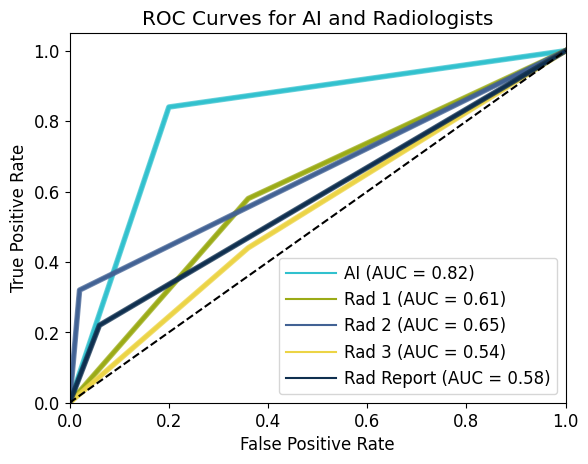

AI: AUC = 0.82, Sensitivity = 0.84, Specificity = 0.80
Rad 1: AUC = 0.61, Sensitivity = 0.58, Specificity = 0.64
Rad 2: AUC = 0.65, Sensitivity = 0.32, Specificity = 0.98
Rad 3: AUC = 0.54, Sensitivity = 0.44, Specificity = 0.64
Rad Report: AUC = 0.58, Sensitivity = 0.22, Specificity = 0.94


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

def calculate_sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

path_to_data = '/content/data_dendro.xlsx'
data = pd.read_excel(path_to_data)

y_true = data['Ground Truth']
predictions = {
    'AI': data['Prediction by AI'],
    'Rad 1': data['Prediction by Rad 1'],
    'Rad 2': data['Prediction by Rad 2'],
    'Rad 3': data['Prediction by Rad 3'],
    'Rad Report': data['Radiology Report']
}

metrics = {}
for pred in predictions:
    auc_score = roc_auc_score(y_true, predictions[pred])
    sensitivity, specificity = calculate_sensitivity_specificity(y_true, predictions[pred])
    metrics[pred] = {'AUC': auc_score, 'Sensitivity': sensitivity, 'Specificity': specificity}

fpr = {}
tpr = {}
roc_auc = {}
for pred in predictions:
    fpr[pred], tpr[pred], _ = roc_curve(y_true, predictions[pred])
    roc_auc[pred] = auc(fpr[pred], tpr[pred])

colors = {
    'AI': '#31c1ce',
    'Rad 1': '#9bab16',
    'Rad 2': '#426294',
    'Rad 3': '#ecd445',
    'Rad Report':'#0f2f4f'
}

plt.figure()
for pred in predictions:
    # Add a loop here for shadow effect
    for width, alpha in zip([2, 3, 4], [0.7, 0.7, 0.7]): # Change these values as needed
        plt.plot(fpr[pred], tpr[pred], linewidth=width, alpha=alpha, color=colors[pred])
    # Plot the main line with label
    plt.plot(fpr[pred], tpr[pred], label=f'{pred} (AUC = {roc_auc[pred]:.2f})', color=colors[pred])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for AI and Radiologists')
plt.legend(loc="lower right", handlelength=3, handletextpad=0.5, borderaxespad=0.5, fontsize='medium')
plt.grid(False)

plt.savefig('/content/roc.pdf', format='pdf', bbox_inches='tight')
plt.show()

for pred, values in metrics.items():
    print(f"{pred}: AUC = {values['AUC']:.2f}, Sensitivity = {values['Sensitivity']:.2f}, Specificity = {values['Specificity']:.2f}")


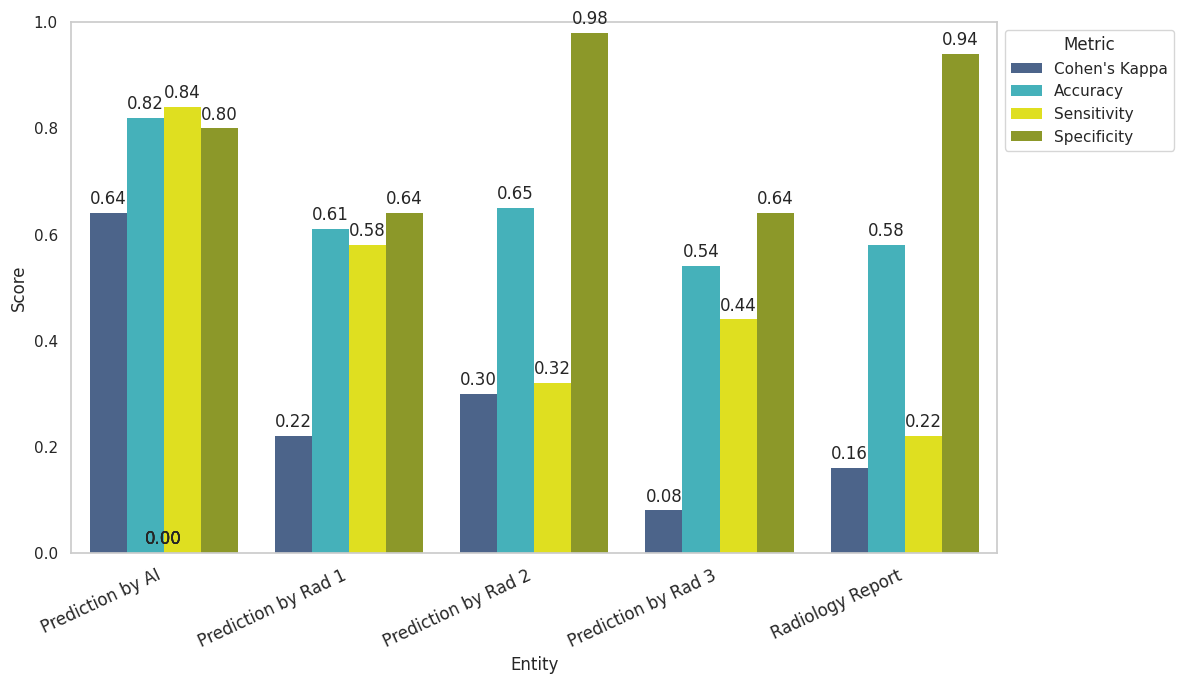

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Load the data
data_path = '/content/data_dendro.xlsx'
data = pd.read_excel(data_path)

# Entities and ground truth
entities = [
    'Prediction by AI',
    'Prediction by Rad 1',
    'Prediction by Rad 2',
    'Prediction by Rad 3',
    'Radiology Report'
]

# Initialize list for storing metrics
metrics_scores = []

# Calculate Cohen's Kappa and Accuracy
for entity in entities:
    kappa_score = cohen_kappa_score(data[entity], data['Ground Truth'])
    correct_predictions = (data[entity] == data['Ground Truth']).sum()
    accuracy = correct_predictions / len(data)
    metrics_scores.append((entity, "Cohen's Kappa", kappa_score))
    metrics_scores.append((entity, 'Accuracy', accuracy))

# Assuming the sensitivity and specificity metrics as provided
sensitivity_specificity = {
    'Prediction by AI': {'Sensitivity': 0.84, 'Specificity': 0.80},
    'Prediction by Rad 1': {'Sensitivity': 0.58, 'Specificity': 0.64},
    'Prediction by Rad 2': {'Sensitivity': 0.32, 'Specificity': 0.98},
    'Prediction by Rad 3': {'Sensitivity': 0.44, 'Specificity': 0.64},
    'Radiology Report': {'Sensitivity': 0.22, 'Specificity': 0.94}
}

# Add sensitivity and specificity to the metrics_scores
for entity, metrics in sensitivity_specificity.items():
    for metric_name, score in metrics.items():
        metrics_scores.append((entity, metric_name, score))

# Convert to DataFrame for visualization
metrics_df = pd.DataFrame(metrics_scores, columns=['Entity', 'Metric', 'Score'])

# Visualization
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")
colors = {
    "Cohen's Kappa": "#426294",  # Grey
    "Accuracy": "#31c1ce",  # Green
    "Sensitivity": "#FFFF00",  # Yellow
    "Specificity": "#9bab16"  # Dark Green
}

# Create the bar plot with hue for differentiating metrics
barplot = sns.barplot(x='Entity', y='Score', hue='Metric', data=metrics_df, palette=colors, edgecolor='none')

plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=25, ha='right', fontsize=12)
plt.ylim(0, 1)  # Adjust y-axis limit
#plt.title('Comprehensive Metrics Comparison', fontsize=12)

# Removing the grid
plt.grid(False)

# Adding text on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points', fontsize=12)

# Place the legend outside the plot on the right side
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('/content/comprehensive_metrics_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()


ANOVA Table:
            sum_sq     df         F    PR(>F)
C(Method)    4.25    3.0  6.512654  0.000261
Residual    86.14  396.0       NaN       NaN

Tukey's HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    AI  Rad 1    -0.21 0.0085 -0.3802 -0.0398   True
    AI  Rad 2    -0.17 0.0503 -0.3402  0.0002  False
    AI  Rad 3    -0.28 0.0002 -0.4502 -0.1098   True
 Rad 1  Rad 2     0.04   0.93 -0.1302  0.2102  False
 Rad 1  Rad 3    -0.07 0.7133 -0.2402  0.1002  False
 Rad 2  Rad 3    -0.11 0.3422 -0.2802  0.0602  False
----------------------------------------------------
Effect size (Cohen's d) for AI vs Rad 1: 0.48
Effect size (Cohen's d) for AI vs Rad 2: 0.39
Effect size (Cohen's d) for AI vs Rad 3: 0.63
Effect size (Cohen's d) for Rad 1 vs Rad 2: -0.08
Effect size (Cohen's d) for Rad 1 vs Rad 3: 0.14
Effect size (Cohen's d) for Rad 2 vs Rad 3: 0.22


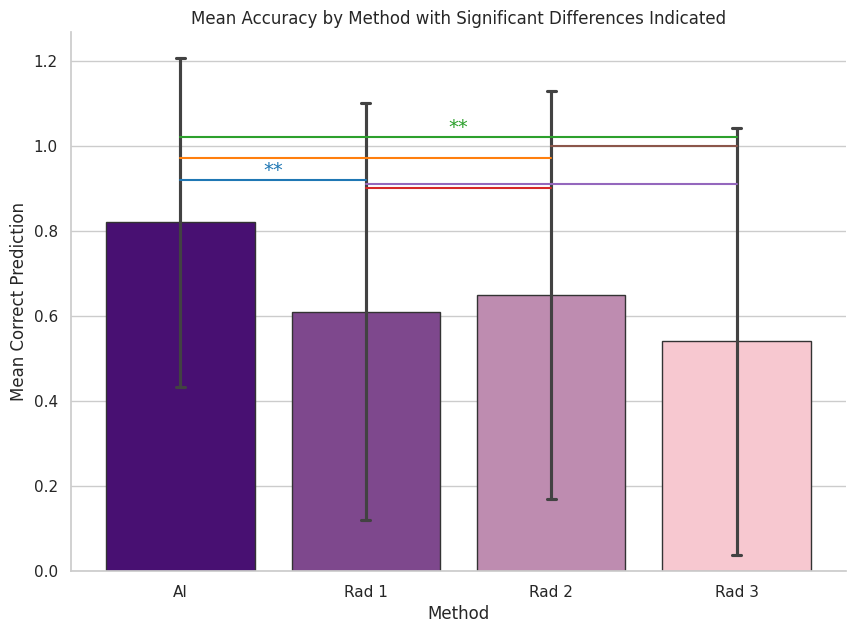

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Function to load data and calculate accuracies
def analyze_accuracy(data_path):
    # Load the data
    data = pd.read_excel(data_path)

    # Identifying prediction columns and the ground truth
    prediction_columns = [col for col in data.columns if 'Prediction' in col]
    ground_truth_column = 'Ground Truth'

    # Converting predictions to binary correct/incorrect relative to the ground truth
    for column in prediction_columns:
        correct_column = f"{column} Correct"
        data[correct_column] = (data[column] == data[ground_truth_column]).astype(int)

    # Melting the data for analysis
    data_long = pd.melt(data, id_vars=['Name', ground_truth_column],
                        value_vars=[f"{col} Correct" for col in prediction_columns],
                        var_name='Method', value_name='Correct')

    # Cleaning method names for readability
    data_long['Method'] = data_long['Method'].str.replace(' Correct', '').str.replace('Prediction by ', '')

    # ANOVA and Tukey's HSD Test
    model = ols('Correct ~ C(Method)', data=data_long).fit()
    anova_results = sm.stats.anova_lm(model, typ=2)
    print("ANOVA Table:\n", anova_results)
    tukey_results = pairwise_tukeyhsd(endog=data_long['Correct'], groups=data_long['Method'], alpha=0.05)
    print("\nTukey's HSD Test Results:\n", tukey_results)

    return data_long, tukey_results

# Function to calculate Cohen's d for effect size
def cohens_d(group1, group2):
    diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt((group1.std()**2 + group2.std()**2) / 2)
    return diff / pooled_std


# Function to visualize the results with a gradient color palette
# Function to visualize the results with a gradient color palette
def visualize_results(data_long, tukey_results):
    plt.figure(figsize=(10, 7))
    mean_accuracy = data_long.groupby('Method')['Correct'].mean().reset_index()

    # Creating a custom color palette from dark purple to light pink for the bars
    bar_colors = ["#4B0082", "#FFC0CB"]  # Dark Purple to Light Pink
    bar_cmap = LinearSegmentedColormap.from_list("Custom", bar_colors, N=20)
    palette_list = bar_cmap(np.linspace(0, 1, len(mean_accuracy['Method'].unique()))).tolist()  # Convert to list

    # Plotting with the custom color palette for the bars
    sns.barplot(x='Method', y='Correct', data=data_long, errorbar='sd', palette=palette_list, edgecolor='.2', capsize=.05, hue='Method', legend=False)
    plt.ylabel('Mean Correct Prediction')
    plt.title('Mean Accuracy by Method with Significant Differences Indicated')

    # Create a color palette for the significance lines
    line_colors = plt.cm.tab10.colors  # Use tab10 colormap for the lines

    # Convert Tukey's HSD results to DataFrame
    tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

    # Annotating significant differences based on Tukey's HSD results
    for index, (row, color) in enumerate(zip(tukey_df.iterrows(), line_colors)):
        _, row = row  # unpack the tuple from iterrows()
        group1, group2 = row['group1'], row['group2']
        mean1 = mean_accuracy[mean_accuracy['Method'] == group1]['Correct'].values[0]
        mean2 = mean_accuracy[mean_accuracy['Method'] == group2]['Correct'].values[0]

        # Define positions for the groups on the x-axis
        position1 = mean_accuracy[mean_accuracy['Method'] == group1].index[0]
        position2 = mean_accuracy[mean_accuracy['Method'] == group2].index[0]

        group1_data = data_long[data_long['Method'] == group1]['Correct']
        group2_data = data_long[data_long['Method'] == group2]['Correct']

        # Calculate Cohen's d for effect size
        effect_size = cohens_d(group1_data, group2_data)
        print(f"Effect size (Cohen's d) for {group1} vs {group2}: {effect_size:.2f}")

        # Draw line and asterisks based on p-value
        y = max(mean1, mean2) + 0.1 + (index * 0.05)  # Slightly raise each subsequent line
        plt.plot([position1, position2], [y, y], lw=1.5, c=color)
        if row['p-adj'] <= 0.01:
            asterisks = '**'  # Two asterisks for p-values at or below 0.01
        elif row['p-adj'] <= 0.05:
            asterisks = '*'  # One asterisk for p-values above 0.01 but at or below 0.05
        else:
            asterisks = ''  # No asterisks for p-values above 0.05
        plt.text((position1 + position2) / 2, y, asterisks, ha='center', va='bottom', color=color, fontsize=14)

    sns.despine()
    plt.show()

# Example usage
data_path = '/content/data_dendro.xlsx'  # Change this to your data file path
data_long, tukey_results = analyze_accuracy(data_path)
visualize_results(data_long, tukey_results)